In [1]:
import pandas as pd

# Load the dataset (assuming it’s saved as 'movies.csv')
df = pd.read_csv('top100.csv')

# Display the first few rows
df.head()

,Position,Const,Created,Modified,Description,Title,Original Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,1,tt0068646,2012-12-21,2017-03-28,Actors: 5 Stars Direction: 5 Stars Screenplay:...,The Godfather,The Godfather,https://www.imdb.com/title/tt0068646/,Movie,9.2,175,1972,"Crime, Drama",2107434,1972-03-24,Francis Ford Coppola
1,2,tt0111161,2012-12-21,2017-03-26,Actors: 4.8 Stars Direction: 5 Stars Screenpla...,The Shawshank Redemption,The Shawshank Redemption,https://www.imdb.com/title/tt0111161/,Movie,9.3,142,1994,Drama,3019758,1994-10-14,Frank Darabont
2,3,tt0108052,2012-12-21,2017-03-26,Actors: 4.9 Stars Direction: 5 Stars Screenpla...,Schindler's List,Schindler's List,https://www.imdb.com/title/tt0108052/,Movie,9.0,195,1993,"Biography, Drama, History",1511813,1994-02-04,Steven Spielberg
3,4,tt0081398,2012-12-21,2017-03-26,Actors: 5 Stars Direction: 5 Stars Screenplay:...,Raging Bull,Raging Bull,https://www.imdb.com/title/tt0081398/,Movie,8.1,129,1980,"Biography, Drama, Sport",393315,1980-12-19,Martin Scorsese
4,5,tt0034583,2012-12-21,2017-03-26,Actors: 5 Stars Direction: 5 Stars Screenplay:...,Casablanca,Casablanca,https://www.imdb.com/title/tt0034583/,Movie,8.5,102,1942,"Drama, Romance, War",627818,1943-01-23,Michael Curtiz


In [2]:
# Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

Number of duplicate rows: 0
Missing values per column:
 Position          0
Const             0
Created           0
Modified          0
Description       0
Title             0
Original Title    0
URL               0
Title Type        0
IMDb Rating       0
Runtime (mins)    0
Year              0
Genres            0
Num Votes         0
Release Date      0
Directors         0
dtype: int64


In [3]:
# Count differences between Title and Original Title
differ = df[df['Title'] != df['Original Title']]
differences = (df['Title'] != df['Original Title']).sum()
print("Number of rows where Title differs from Original Title:", differences)
differ[['Title','Original Title']]

Number of rows where Title differs from Original Title: 3


,Title,Original Title
19,Star Wars: Episode IV - A New Hope,Star Wars
53,"The Good, the Bad and the Ugly","Il buono, il brutto, il cattivo"
62,Goodfellas,GoodFellas


In [4]:
import re

# Function to parse Description
def parse_description(desc):
    data = {
        'Actors_Stars': 0, 'Direction_Stars': 0, 'Screenplay_Stars': 0,
        'Oscars': 0, 'Oscar_Nominations': 0, 'BAFTA_Awards': 0,
        'BAFTA_Nominations': 0, 'Golden_Globes': 0, 'Golden_Globe_Nominations': 0
    }
    patterns = {
        'Actors_Stars': r"Actors: (\d+\.?\d*) Stars",
        'Direction_Stars': r"Direction: (\d+\.?\d*) Stars",
        'Screenplay_Stars': r"Screenplay: (\d+\.?\d*) Stars",
        'Oscars': r"Oscars: (\d+)",
        'Oscar_Nominations': r"Oscar Nominations: (\d+)",
        'BAFTA_Awards': r"BAFTA Awards: (\d+)",
        'BAFTA_Nominations': r"BAFTA Nominations: (\d+)",
        'Golden_Globes': r"Golden Globes: (\d+)",
        'Golden_Globe_Nominations': r"Golden Globe Nominations: (\d+)"
    }
    for key, pattern in patterns.items():
        match = re.search(pattern, desc)
        if match:
            data[key] = float(match.group(1)) if 'Stars' in key else int(match.group(1))
    return data

# Apply parsing and add new columns
parsed_data = df['Description'].apply(parse_description).apply(pd.Series)
df = pd.concat([df, parsed_data], axis=1)
parsed_data.head()

,Actors_Stars,Direction_Stars,Screenplay_Stars,Oscars,Oscar_Nominations,BAFTA_Awards,BAFTA_Nominations,Golden_Globes,Golden_Globe_Nominations
0,5.0,5.0,5.0,3.0,11.0,0.0,4.0,6.0,8.0
1,4.8,5.0,4.9,0.0,7.0,0.0,0.0,0.0,2.0
2,4.9,5.0,5.0,7.0,12.0,6.0,12.0,3.0,6.0
3,5.0,5.0,5.0,2.0,8.0,2.0,4.0,1.0,7.0
4,5.0,5.0,5.0,3.0,8.0,0.0,0.0,0.0,0.0


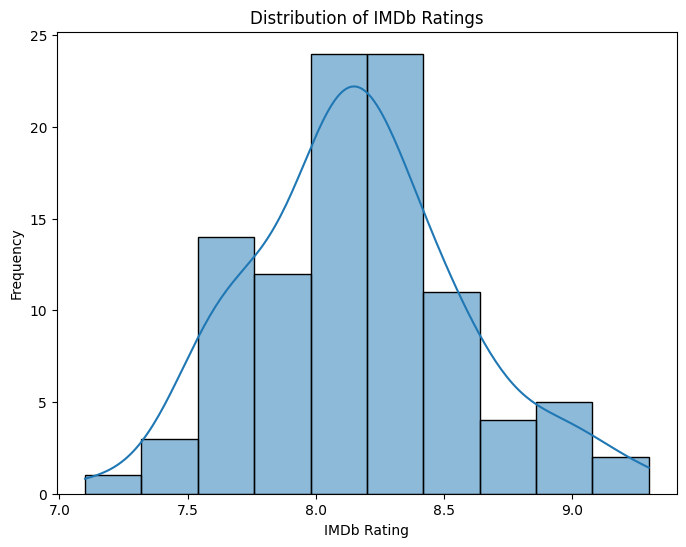

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of IMDb ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['IMDb Rating'], bins=10, kde=True)
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.show()

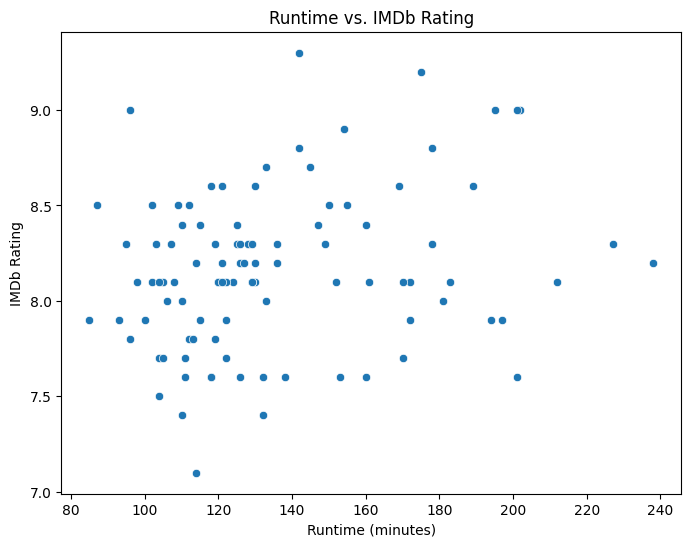

In [6]:
# Scatter plot of Runtime vs. IMDb Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Runtime (mins)', y='IMDb Rating', data=df)
plt.title('Runtime vs. IMDb Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Rating')
plt.show()

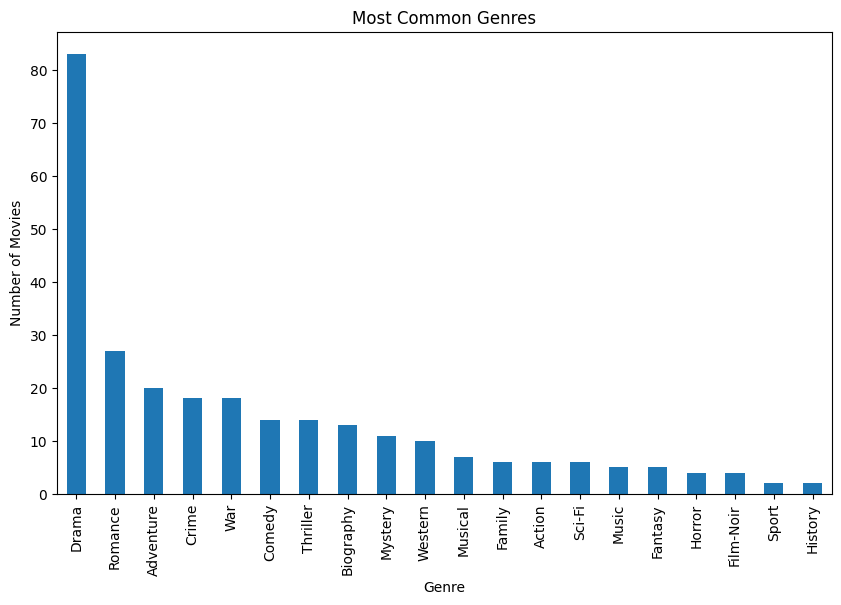

In [7]:
# Split and explode Genres
df['Genres'] = df['Genres'].str.split(', ')
all_genres = df.explode('Genres')['Genres'].value_counts()

# Bar chart of genre frequencies
plt.figure(figsize=(10, 6))
all_genres.plot(kind='bar')
plt.title('Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

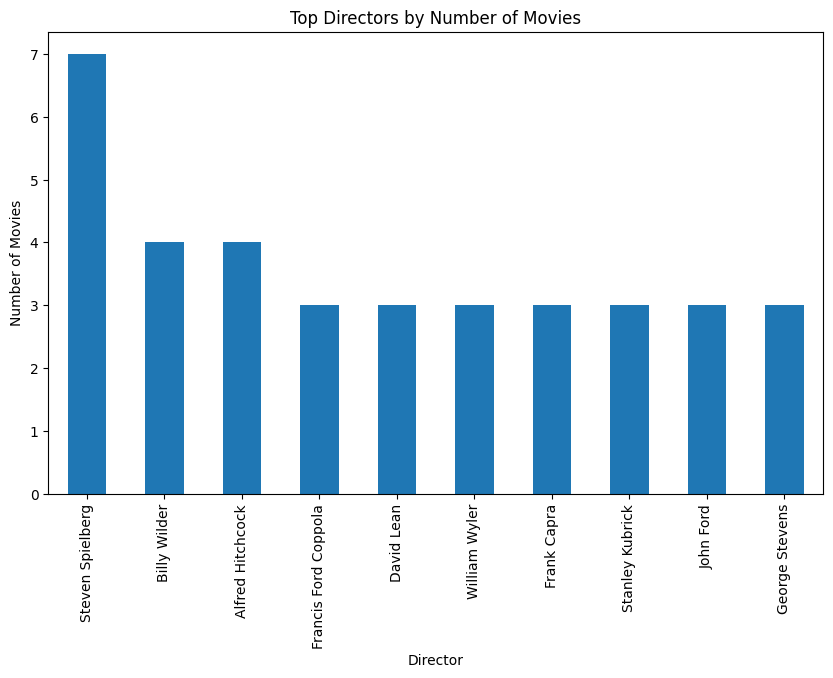

In [8]:
# Count movies per director
director_counts = df['Directors'].value_counts()

# Bar chart of top directors
plt.figure(figsize=(10, 6))
director_counts.head(10).plot(kind='bar')
plt.title('Top Directors by Number of Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.show()

In [ ]:
genre

Correlation Matrix:
                   Actors_Stars  Direction_Stars  Screenplay_Stars  IMDb Rating
Actors_Stars          1.000000         0.610002          0.738412     0.340899
Direction_Stars       0.610002         1.000000          0.726515     0.496777
Screenplay_Stars      0.738412         0.726515          1.000000     0.422816
IMDb Rating           0.340899         0.496777          0.422816     1.000000


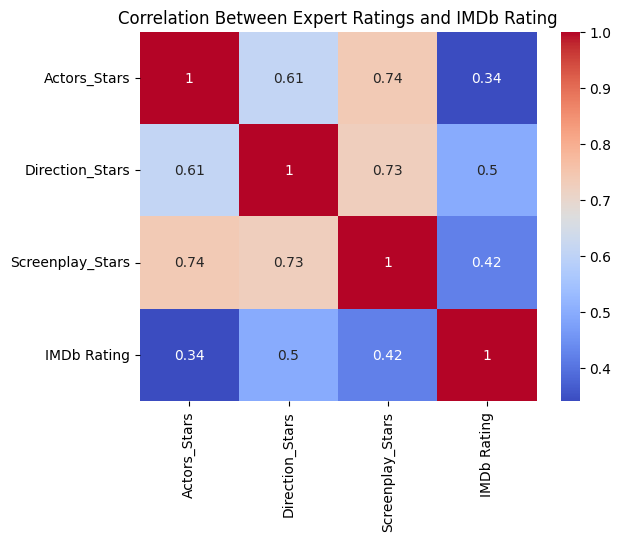

In [9]:
# Correlation matrix
correlations = df[['Actors_Stars', 'Direction_Stars', 'Screenplay_Stars', 'IMDb Rating']].corr()

# Display and visualize
print("Correlation Matrix:\n", correlations)
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Between Expert Ratings and IMDb Rating')
plt.show()

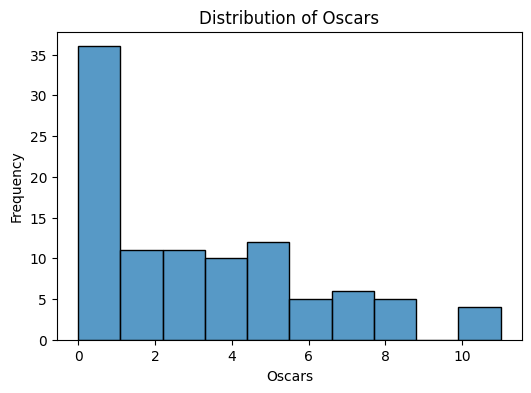

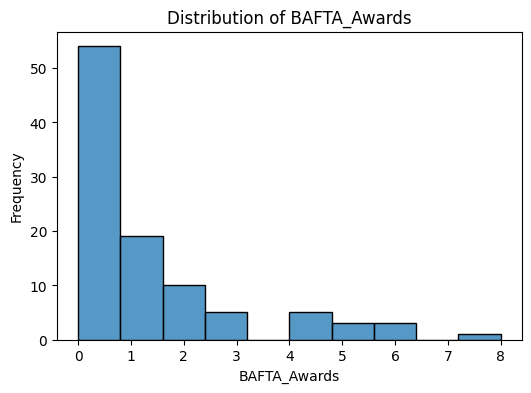

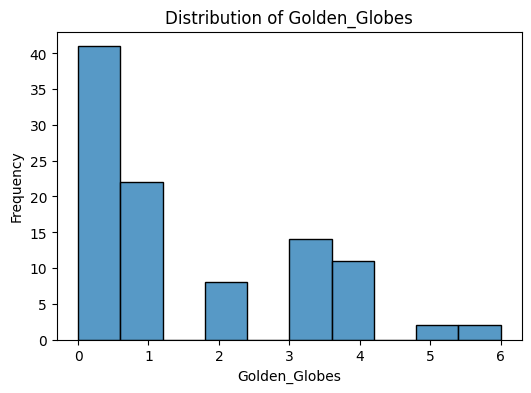

In [10]:
# Histograms for award wins
award_columns = ['Oscars', 'BAFTA_Awards', 'Golden_Globes']
for col in award_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=10, kde=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

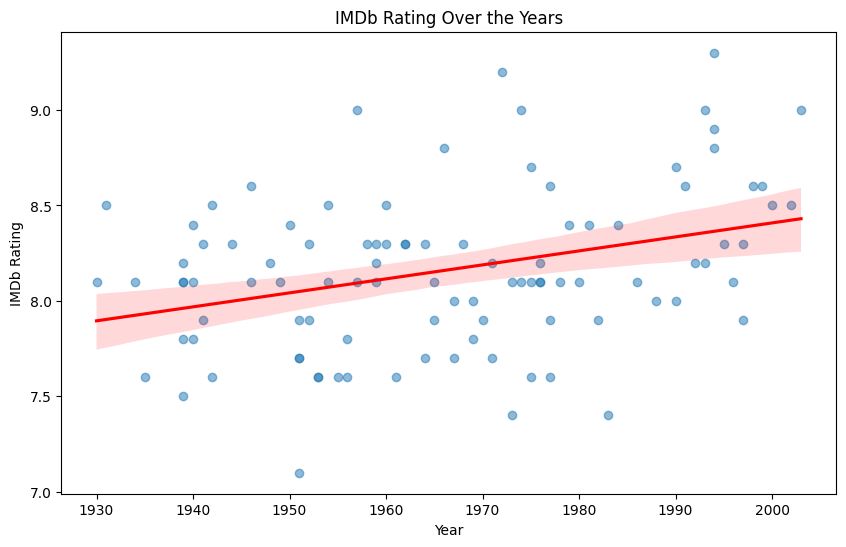

In [11]:
# Scatter plot with trend line
plt.figure(figsize=(10, 6))
sns.regplot(x='Year', y='IMDb Rating', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('IMDb Rating Over the Years')
plt.xlabel('Year')
plt.ylabel('IMDb Rating')
plt.show()

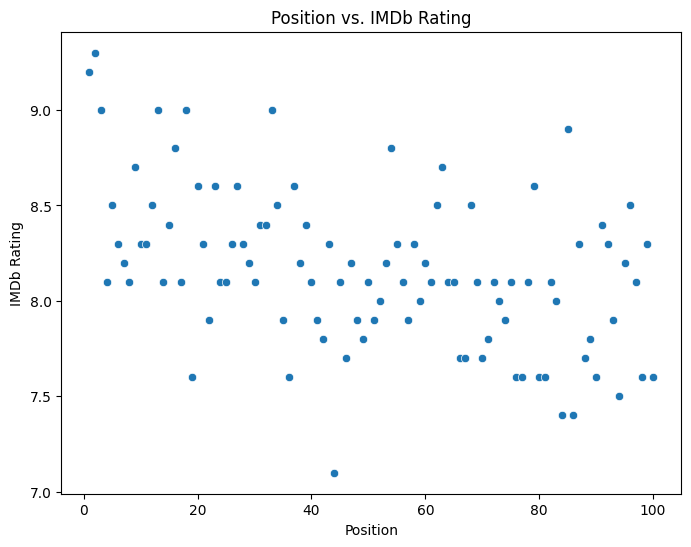

In [12]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Position', y='IMDb Rating', data=df)
plt.title('Position vs. IMDb Rating')
plt.xlabel('Position')
plt.ylabel('IMDb Rating')
plt.show()

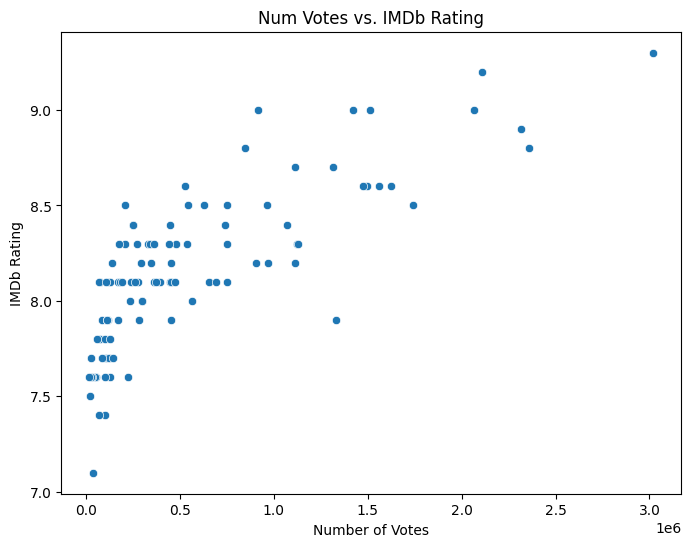

In [13]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Num Votes', y='IMDb Rating', data=df)
plt.title('Num Votes vs. IMDb Rating')
plt.xlabel('Number of Votes')
plt.ylabel('IMDb Rating')
plt.show()

In [14]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import re

# Load the dataset (adjust path as needed)
df = pd.read_csv('top100.csv')

# Function to parse Description
def parse_description(desc):
    data = {
        'Actors_Stars': 0, 'Direction_Stars': 0, 'Screenplay_Stars': 0,
        'Oscars': 0, 'Oscar_Nominations': 0, 'BAFTA_Awards': 0,
        'BAFTA_Nominations': 0, 'Golden_Globes': 0, 'Golden_Globe_Nominations': 0
    }
    patterns = {
        'Actors_Stars': r"Actors: (\d+\.?\d*) Stars",
        'Direction_Stars': r"Direction: (\d+\.?\d*) Stars",
        'Screenplay_Stars': r"Screenplay: (\d+\.?\d*) Stars",
        'Oscars': r"Oscars: (\d+)",
        'Oscar_Nominations': r"Oscar Nominations: (\d+)",
        'BAFTA_Awards': r"BAFTA Awards: (\d+)",
        'BAFTA_Nominations': r"BAFTA Nominations: (\d+)",
        'Golden_Globes': r"Golden Globes: (\d+)",
        'Golden_Globe_Nominations': r"Golden Globe Nominations: (\d+)"
    }
    for key, pattern in patterns.items():
        match = re.search(pattern, desc)
        if match:
            data[key] = float(match.group(1)) if 'Stars' in key else int(match.group(1))
    return data

# Extract features from Description
parsed_data = df['Description'].apply(parse_description).apply(pd.Series)
df = pd.concat([df, parsed_data], axis=1)

# Split and one-hot encode Genres
df['Genres'] = df['Genres'].str.split(', ')
all_genres = sorted(set.union(*df['Genres'].apply(set)))
for genre in all_genres:
    df[genre] = df['Genres'].apply(lambda x: 1 if genre in x else 0)

# Numerical features to standardize
num_features = ['Actors_Stars', 'Direction_Stars', 'Screenplay_Stars', 'Oscars',
                'Oscar_Nominations', 'BAFTA_Awards', 'BAFTA_Nominations',
                'Golden_Globes', 'Golden_Globe_Nominations']

# Standardize numerical features
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

# Create feature matrix
feature_cols = num_features + all_genres
feature_matrix = df[feature_cols].values

# Compute similarity matrix
similarity_matrix = cosine_similarity(feature_matrix)

# Recommendation function
def get_recommendations(title, N=5, K=50):
    idx = df[df['Title'] == title].index[0]
    sim_scores = similarity_matrix[idx]
    top_indices = np.argsort(sim_scores)[::-1][1:K+1]  # Exclude self
    top_movies = df.iloc[top_indices][['Title', 'IMDb Rating']]
    top_movies = top_movies.sort_values('IMDb Rating', ascending=False)
    return top_movies.head(N)['Title'].tolist()

# Example usage
recommendations = get_recommendations('The Godfather')
print("Recommended movies:", recommendations)
for i in recommendations:
    print(i)

Recommended movies: ['12 Angry Men', 'The Lord of the Rings: The Return of the King', "Schindler's List", 'The Godfather Part II', 'Pulp Fiction']
12 Angry Men
The Lord of the Rings: The Return of the King
Schindler's List
The Godfather Part II
Pulp Fiction


In [15]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import re
from datetime import datetime

# Load the dataset (adjust path as needed)
df = pd.read_csv('top100.csv')

# Function to parse Description with error handling
def parse_description(desc):
    if not isinstance(desc, str):
        return {
            'Actors_Stars': 0, 'Direction_Stars': 0, 'Screenplay_Stars': 0,
            'Oscars': 0, 'Oscar_Nominations': 0, 'BAFTA_Awards': 0,
            'BAFTA_Nominations': 0, 'Golden_Globes': 0, 'Golden_Globe_Nominations': 0
        }
        
    data = {
        'Actors_Stars': 0, 'Direction_Stars': 0, 'Screenplay_Stars': 0,
        'Oscars': 0, 'Oscar_Nominations': 0, 'BAFTA_Awards': 0,
        'BAFTA_Nominations': 0, 'Golden_Globes': 0, 'Golden_Globe_Nominations': 0
    }
    
    patterns = {
        'Actors_Stars': r"Actors: (\d+\.?\d*) Stars",
        'Direction_Stars': r"Direction: (\d+\.?\d*) Stars",
        'Screenplay_Stars': r"Screenplay: (\d+\.?\d*) Stars",
        'Oscars': r"Oscars: (\d+)",
        'Oscar_Nominations': r"Oscar Nominations: (\d+)",
        'BAFTA_Awards': r"BAFTA Awards: (\d+)",
        'BAFTA_Nominations': r"BAFTA Nominations: (\d+)",
        'Golden_Globes': r"Golden Globes: (\d+)",
        'Golden_Globe_Nominations': r"Golden Globe Nominations: (\d+)"
    }
    
    for key, pattern in patterns.items():
        match = re.search(pattern, desc)
        if match:
            data[key] = float(match.group(1)) if 'Stars' in key else int(match.group(1))
    
    return data

# Clean and preprocess data
df = df.dropna(subset=['Title', 'Year', 'IMDb Rating'])

# Extract features from Description
parsed_data = df['Description'].apply(parse_description).apply(pd.Series)
df = pd.concat([df, parsed_data], axis=1)

# Handle missing values in important columns
df['Genres'] = df['Genres'].fillna('')
df['Runtime (mins)'] = pd.to_numeric(df['Runtime (mins)'], errors='coerce').fillna(0)
df['Num Votes'] = pd.to_numeric(df['Num Votes'], errors='coerce').fillna(0)

# Process directors
df['Directors'] = df['Directors'].fillna('')
df['Director_Count'] = df['Directors'].apply(lambda x: len(str(x).split(',')) if x else 0)

# Process release date
df['Release_Year'] = df['Release Date'].str.extract(r'(\d{4})').astype(float).fillna(df['Year'])
current_year = datetime.now().year
df['Movie_Age'] = current_year - df['Release_Year']

# Split and one-hot encode Genres
df['Genres'] = df['Genres'].str.split(', ')
all_genres = []
for genres in df['Genres']:
    if isinstance(genres, list):
        all_genres.extend(genres)
all_genres = sorted(set(all_genres))

for genre in all_genres:
    df[genre] = df['Genres'].apply(lambda x: 1 if isinstance(x, list) and genre in x else 0)

# Feature engineering
df['Rating_Votes_Product'] = df['IMDb Rating'] * np.log1p(df['Num Votes'])
df['Runtime_Norm'] = df['Runtime (mins)'] / df['Runtime (mins)'].max()

# Numerical features to standardize
num_features = [
    'IMDb Rating', 'Runtime_Norm', 'Actors_Stars', 'Direction_Stars', 'Screenplay_Stars',
    'Oscars', 'Oscar_Nominations', 'BAFTA_Awards', 'BAFTA_Nominations',
    'Golden_Globes', 'Golden_Globe_Nominations', 'Director_Count',
    'Rating_Votes_Product', 'Movie_Age'
]

# Standardize numerical features
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features].fillna(0))

# Create feature matrix
feature_cols = num_features + all_genres
feature_matrix = df[feature_cols].fillna(0).values

# Compute similarity matrix
similarity_matrix = cosine_similarity(feature_matrix)

# Create feature importance weights
feature_weights = {
    'IMDb Rating': 2.0,
    'Runtime_Norm': 0.5,
    'Actors_Stars': 1.5,
    'Direction_Stars': 1.5,
    'Screenplay_Stars': 1.5,
    'Oscars': 1.2,
    'Oscar_Nominations': 0.8,
    'BAFTA_Awards': 1.0,
    'BAFTA_Nominations': 0.7,
    'Golden_Globes': 1.0,
    'Golden_Globe_Nominations': 0.7,
    'Director_Count': 0.3,
    'Rating_Votes_Product': 1.8,
    'Movie_Age': 0.2
}

# Apply weights to genre features
genre_weight = 1.0
for genre in all_genres:
    feature_weights[genre] = genre_weight

# Enhanced recommendation function
def get_recommendations(title=None, movie_id=None, N=5, similarity_threshold=0.3, 
                        min_rating=7.0, include_genres=None, exclude_genres=None, 
                        year_range=None, weighted=True):
    """
    Get movie recommendations based on title or movie ID.
    
    Parameters:
    -----------
    title : str, optional
        Title of the movie to base recommendations on
    movie_id : str, optional
        IMDB ID of the movie to base recommendations on
    N : int, default=5
        Number of recommendations to return
    similarity_threshold : float, default=0.3
        Minimum similarity score to consider
    min_rating : float, default=7.0
        Minimum IMDB rating to consider
    include_genres : list, optional
        List of genres that recommendations should include at least one of
    exclude_genres : list, optional
        List of genres that recommendations should not include
    year_range : tuple, optional
        (min_year, max_year) range for recommendations
    weighted : bool, default=True
        Whether to use feature weights
        
    Returns:
    --------
    dict : Dictionary containing recommendations and their details
    """
    # Find the index of the reference movie
    if title:
        if title not in df['Title'].values:
            closest_match = df['Title'].iloc[df['Title'].str.lower().apply(
                lambda x: sum(1 for a, b in zip(x.lower(), title.lower()) if a == b) / max(len(x), len(title))
            ).argmax()]
            print(f"Movie '{title}' not found. Using closest match: '{closest_match}'")
            title = closest_match
        idx = df[df['Title'] == title].index[0]
    elif movie_id:
        if movie_id not in df['IMDb ID'].values:
            return {"error": f"Movie with ID {movie_id} not found"}
        idx = df[df['IMDb ID'] == movie_id].index[0]
    else:
        return {"error": "Must provide either title or movie_id"}
    
    # Get the reference movie details
    ref_movie = df.iloc[idx]
    
    # Apply weights to features if requested
    if weighted:
        weighted_features = np.array([feature_weights.get(col, 1.0) for col in feature_cols])
        weighted_feature_matrix = feature_matrix * weighted_features
        sim_scores = cosine_similarity([weighted_feature_matrix[idx]], weighted_feature_matrix)[0]
    else:
        sim_scores = similarity_matrix[idx]
    
    # Filter by rating if specified
    rating_mask = df['IMDb Rating'] >= min_rating
    
    # Filter by genres if specified
    genre_mask = pd.Series([True] * len(df))
    if include_genres:
        include_mask = pd.Series([False] * len(df))
        for genre in include_genres:
            if genre in all_genres:
                include_mask |= df[genre] == 1
        genre_mask &= include_mask
        
    if exclude_genres:
        exclude_mask = pd.Series([True] * len(df))
        for genre in exclude_genres:
            if genre in all_genres:
                exclude_mask &= df[genre] == 0
        genre_mask &= exclude_mask
    
    # Filter by year range if specified
    year_mask = pd.Series([True] * len(df))
    if year_range:
        min_year, max_year = year_range
        year_mask &= (df['Year'] >= min_year) & (df['Year'] <= max_year)
    
    # Combine all filters
    combined_mask = rating_mask & genre_mask & year_mask
    
    # Apply similarity threshold
    sim_mask = sim_scores >= similarity_threshold
    
    # Convert to pandas series for easier indexing
    sim_series = pd.Series(sim_scores)
    
    # Get indices of movies that meet all criteria, excluding the reference movie
    valid_indices = df.index[combined_mask & sim_mask & (df.index != idx)]
    
    # If no valid movies found, relax constraints
    if len(valid_indices) < N:
        print("Not enough matches found with current criteria. Relaxing constraints...")
        valid_indices = df.index[sim_mask & (df.index != idx)]
    
    # Sort by similarity score
    valid_indices = valid_indices[sim_series.loc[valid_indices].argsort()[::-1]]
    
    # Get top N recommendations
    top_indices = valid_indices[:N]
    
    # Get recommendation details
    recommendations = []
    for i in top_indices:
        movie = df.iloc[i]
        rec = {
            "Title": movie['Title'],
            "Year": int(movie['Year']),
            "IMDb Rating": float(movie['IMDb Rating']),
            "Genres": movie['Genres'] if isinstance(movie['Genres'], list) else [],
            "Director": movie['Directors'],
            "Runtime": int(movie['Runtime (mins)']),
            "Similarity Score": float(sim_scores[i]),
            "IMDb ID": movie['IMDb ID'] if 'IMDb ID' in df.columns else None
        }
        recommendations.append(rec)
    
    return {
        "Reference Movie": {
            "Title": ref_movie['Title'],
            "Year": int(ref_movie['Year']),
            "IMDb Rating": float(ref_movie['IMDb Rating']),
            "Genres": ref_movie['Genres'] if isinstance(ref_movie['Genres'], list) else []
        },
        "Recommendations": recommendations
    }

def get_recommendations_for_user(user_ratings, N=10, min_rating=None, include_genres=None, exclude_genres=None):
    """
    Get recommendations based on multiple movies a user has rated
    
    Parameters:
    -----------
    user_ratings : dict
        Dictionary mapping movie titles to user ratings (1-10)
    N : int, default=10
        Number of recommendations to return
    min_rating : float, optional
        Minimum IMDB rating to consider
    include_genres : list, optional
        List of genres that recommendations should include at least one of
    exclude_genres : list, optional
        List of genres that recommendations should not include
        
    Returns:
    --------
    list : List of recommended movie titles
    """
    # Validate user ratings
    valid_ratings = {}
    for title, rating in user_ratings.items():
        if title in df['Title'].values:
            valid_ratings[title] = min(max(rating, 1), 10)  # Ensure rating is between 1-10
        else:
            print(f"Warning: Movie '{title}' not found in the database")
    
    if not valid_ratings:
        return {"error": "No valid movies found in user ratings"}
    
    # Calculate weighted average similarity scores
    weighted_sim_scores = np.zeros(len(df))
    
    for title, rating in valid_ratings.items():
        idx = df[df['Title'] == title].index[0]
        # Convert rating to weight (1-10 → 0.1-1.0)
        weight = rating / 10.0
        weighted_sim_scores += similarity_matrix[idx] * weight
    
    # Normalize by sum of weights
    weighted_sim_scores /= sum(valid_ratings.values()) / 10.0
    
    # Create a mask for movies the user has already rated
    rated_mask = pd.Series([True] * len(df))
    for title in valid_ratings:
        rated_mask &= df['Title'] != title
    
    # Filter by rating if specified
    rating_mask = pd.Series([True] * len(df))
    if min_rating:
        rating_mask = df['IMDb Rating'] >= min_rating
    
    # Filter by genres if specified
    genre_mask = pd.Series([True] * len(df))
    if include_genres:
        include_mask = pd.Series([False] * len(df))
        for genre in include_genres:
            if genre in all_genres:
                include_mask |= df[genre] == 1
        genre_mask &= include_mask
        
    if exclude_genres:
        exclude_mask = pd.Series([True] * len(df))
        for genre in exclude_genres:
            if genre in all_genres:
                exclude_mask &= df[genre] == 0
        genre_mask &= exclude_mask
    
    # Combine all filters
    combined_mask = rated_mask & rating_mask & genre_mask
    
    # Convert to pandas series for easier indexing
    sim_series = pd.Series(weighted_sim_scores)
    
    # Get indices of movies that meet all criteria, excluding already rated movies
    valid_indices = df.index[combined_mask]
    
    # Sort by similarity score
    valid_indices = valid_indices[sim_series.loc[valid_indices].argsort()[::-1]]
    
    # Get top N recommendations
    top_indices = valid_indices[:N]
    
    # Get recommendation details
    recommendations = []
    for i in top_indices:
        movie = df.iloc[i]
        rec = {
            "Title": movie['Title'],
            "Year": int(movie['Year']),
            "IMDb Rating": float(movie['IMDb Rating']),
            "Genres": movie['Genres'] if isinstance(movie['Genres'], list) else [],
            "Director": movie['Directors'],
            "Runtime": int(movie['Runtime (mins)']),
            "Similarity Score": float(weighted_sim_scores[i]),
            "IMDb ID": movie['IMDb ID'] if 'IMDb ID' in df.columns else None
        }
        recommendations.append(rec)
    
    return {
        "User Ratings": valid_ratings,
        "Recommendations": recommendations
    }

# Provide a list of all available genres
def get_all_genres():
    return all_genres

# Get popular movies by genre
def get_popular_by_genre(genre, N=5, min_votes=1000):
    """Get popular movies by genre"""
    if genre not in all_genres:
        return {"error": f"Genre '{genre}' not found. Available genres: {', '.join(all_genres)}"}
    
    # Filter by genre and minimum votes
    genre_movies = df[(df[genre] == 1) & (df['Num Votes'] >= min_votes)]
    
    # Sort by IMDb rating
    top_movies = genre_movies.sort_values('IMDb Rating', ascending=False).head(N)
    
    # Format results
    results = []
    for _, movie in top_movies.iterrows():
        results.append({
            "Title": movie['Title'],
            "Year": int(movie['Year']),
            "IMDb Rating": float(movie['IMDb Rating']),
            "Votes": int(movie['Num Votes']),
            "Director": movie['Directors']
        })
    
    return {"Genre": genre, "Popular Movies": results}

# Example usage
if __name__ == "__main__":
    # Get recommendations for a single movie
    movie = 'Forrest Gump'
    print(f"\nRecommendations for {movie}:")
    godfather_recs = get_recommendations(movie, N=5)
    for rec in godfather_recs["Recommendations"]:
        print(f"{rec['Title']} ({rec['Year']}) - {rec['IMDb Rating']} - Similarity: {rec['Similarity Score']:.2f}")
    
    # Get recommendations based on user ratings
    # print("\nRecommendations based on user ratings:")
    # user_ratings = {
    #     "The Godfather": 10,
    #     "Schindler's List": 9,
    #     "Casablanca": 8
    # }
    # user_recs = get_recommendations_for_user(user_ratings, N=5)
    # for rec in user_recs["Recommendations"]:
    #     print(f"{rec['Title']} ({rec['Year']}) - {rec['IMDb Rating']} - Similarity: {rec['Similarity Score']:.2f}")
    
    # Get popular movies by genre
    print("\nPopular War movies:")
    drama_movies = get_popular_by_genre("War", N=3)
    for movie in drama_movies["Popular Movies"]:
        print(f"{movie['Title']} ({movie['Year']}) - {movie['IMDb Rating']} - {movie['Votes']} votes")


Recommendations for Forrest Gump:
Not enough matches found with current criteria. Relaxing constraints...
The Godfather (1972) - 2.5068624922419716 - Similarity: 0.90
The Godfather Part II (1974) - 2.0243095582204194 - Similarity: 0.89
Saving Private Ryan (1998) - 1.059203690177311 - Similarity: 0.87
The Silence of the Lambs (1991) - 1.059203690177311 - Similarity: 0.84
Schindler's List (1993) - 2.0243095582204194 - Similarity: 0.83

Popular War movies:
Saving Private Ryan (1998) - 1.059203690177311 - 1558404 votes
Casablanca (1942) - 0.8179272231665349 - 627818 votes
The Pianist (2002) - 0.8179272231665349 - 960586 votes
